<h1> Using the Bankruptcy Dataset

<h2> Importing the dataset</h2>

In [2]:
import pandas as pd
df = pd.read_csv('bankruptcy.csv')


In [3]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [4]:
x = df.drop(columns="class")
y = df['class']

<h2> Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression ## SelectKBest asks python to find the most useful features. f_regression is a "fast and simple way of scoring these variables"
model = SelectKBest(score_func= f_regression, k=10) ## What is the k variable? -> tells python to select only the top 10 features
f = model.fit(x,df['class']).get_support()

In [6]:
df = df.loc[:, ['class','Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51']]


<h2> Data Visualization

In [7]:
df.describe()
## in this case, don't look like we need to normalize anything

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.020300,-0.003544,0.009053,-0.002092,0.004570,0.008561,-0.004581,0.004990,-0.004104,0.000980,-0.001850
std,0.141032,1.015494,1.064426,1.221631,0.993429,1.057773,1.238670,0.984670,1.164521,0.990897,1.051308
min,0.000000,-25.597146,-0.966015,-97.172752,-7.243222,-1.010521,-100.671151,-7.834373,-81.571260,-0.991489,-1.560279
25%,0.000000,-0.516971,-0.445667,-0.305785,-0.425618,-0.445706,-0.334718,-0.409379,-0.362912,-0.479160,-0.671175
50%,0.000000,0.003186,-0.260150,-0.051330,-0.244403,-0.260870,-0.070187,-0.232934,-0.080775,-0.230765,-0.144492
75%,0.000000,0.585722,0.098874,0.316930,0.117491,0.095591,0.298283,0.108514,0.337973,0.139985,0.492830
max,1.000000,3.324327,47.504463,11.367801,30.016115,45.284425,9.778090,26.317555,11.908359,24.149898,46.280276


<AxesSubplot:>

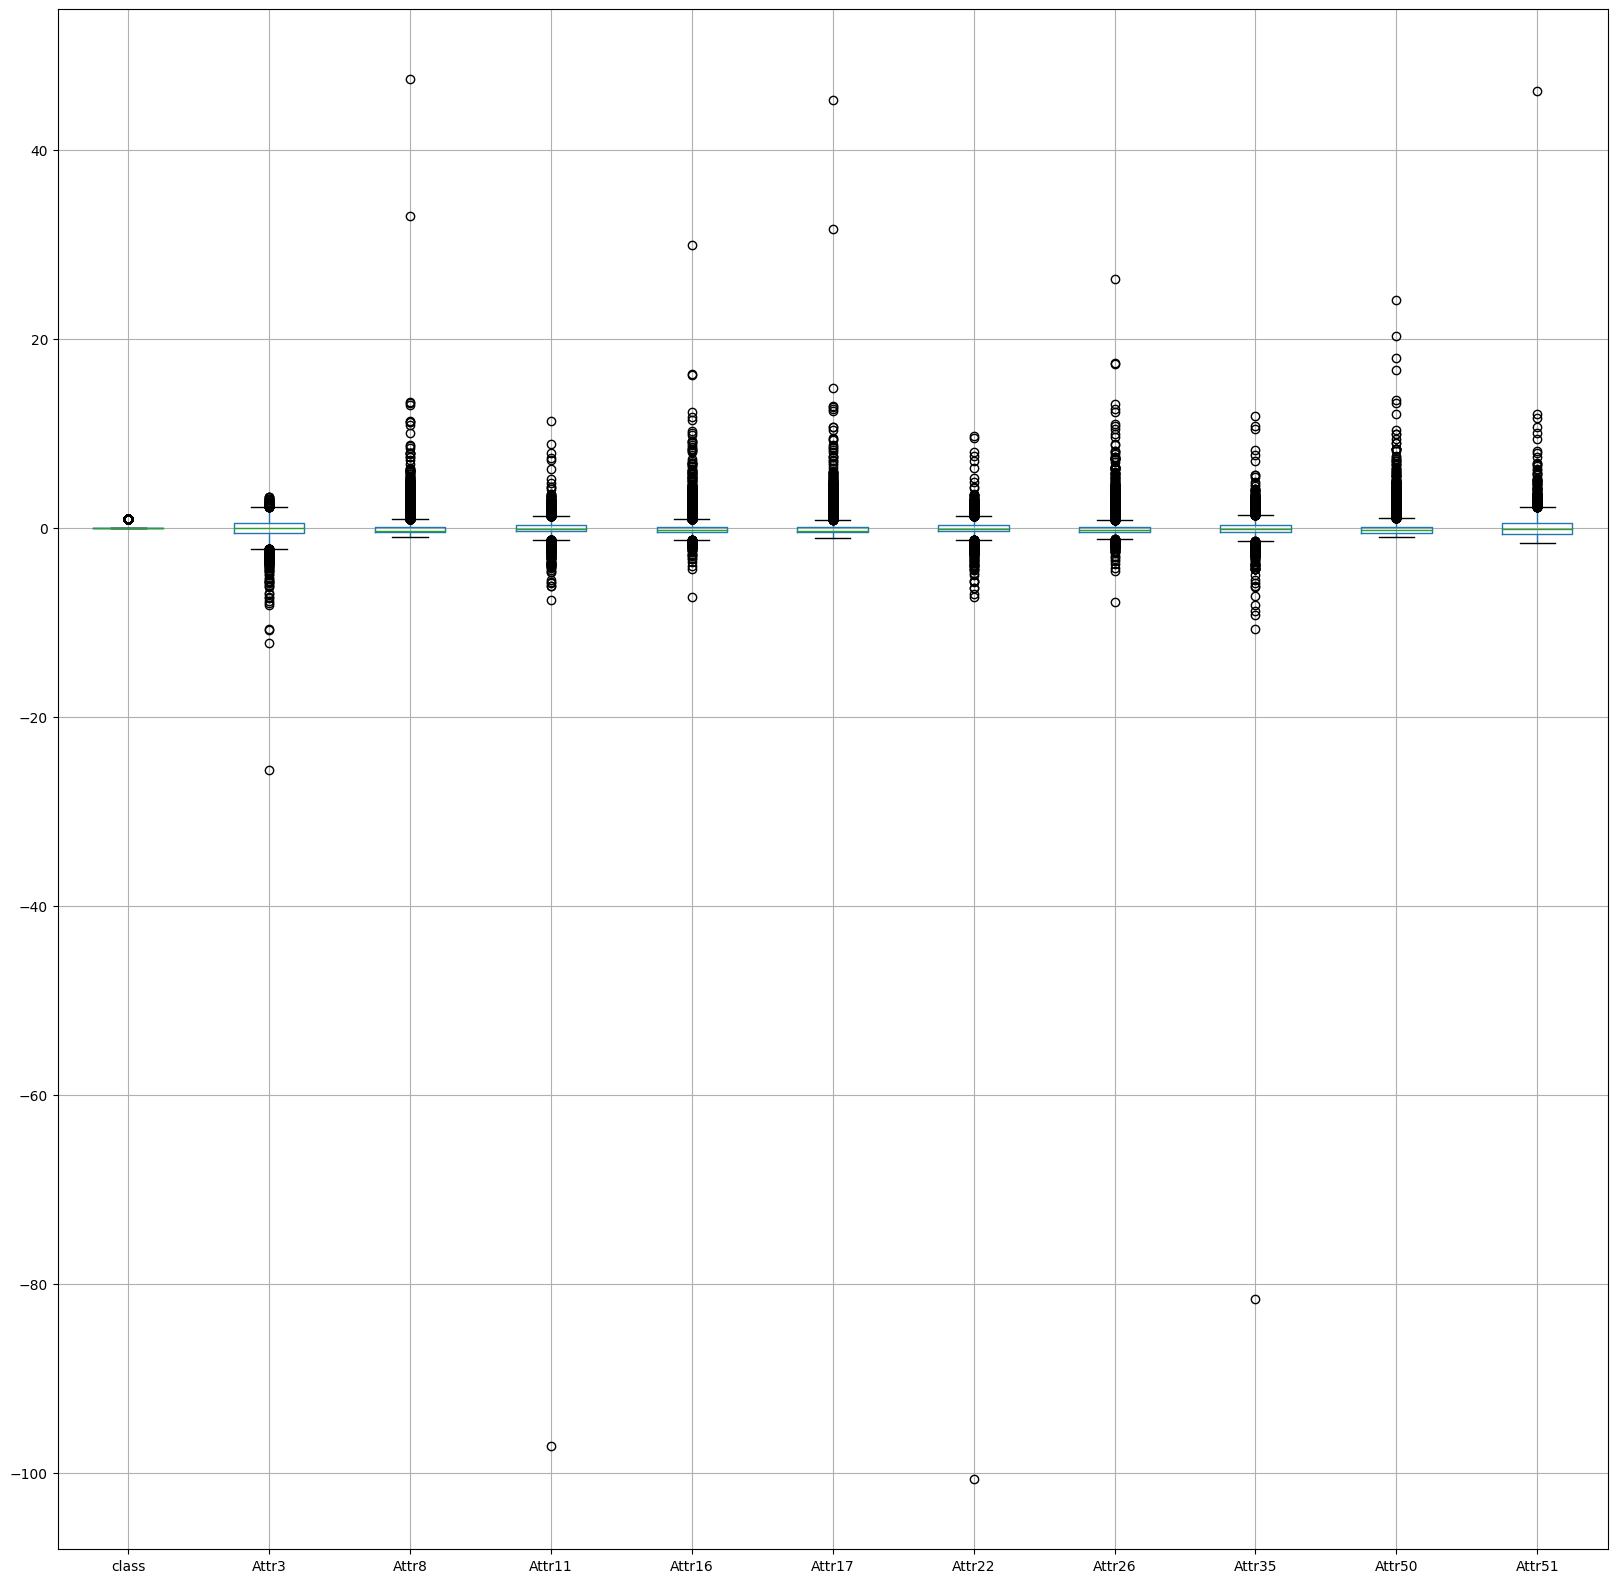

In [7]:
df.boxplot(figsize=(20,20))

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'Attr3'}>,
        <AxesSubplot:title={'center':'Attr8'}>],
       [<AxesSubplot:title={'center':'Attr11'}>,
        <AxesSubplot:title={'center':'Attr16'}>,
        <AxesSubplot:title={'center':'Attr17'}>],
       [<AxesSubplot:title={'center':'Attr22'}>,
        <AxesSubplot:title={'center':'Attr26'}>,
        <AxesSubplot:title={'center':'Attr35'}>],
       [<AxesSubplot:title={'center':'Attr50'}>,
        <AxesSubplot:title={'center':'Attr51'}>, <AxesSubplot:>]],
      dtype=object)

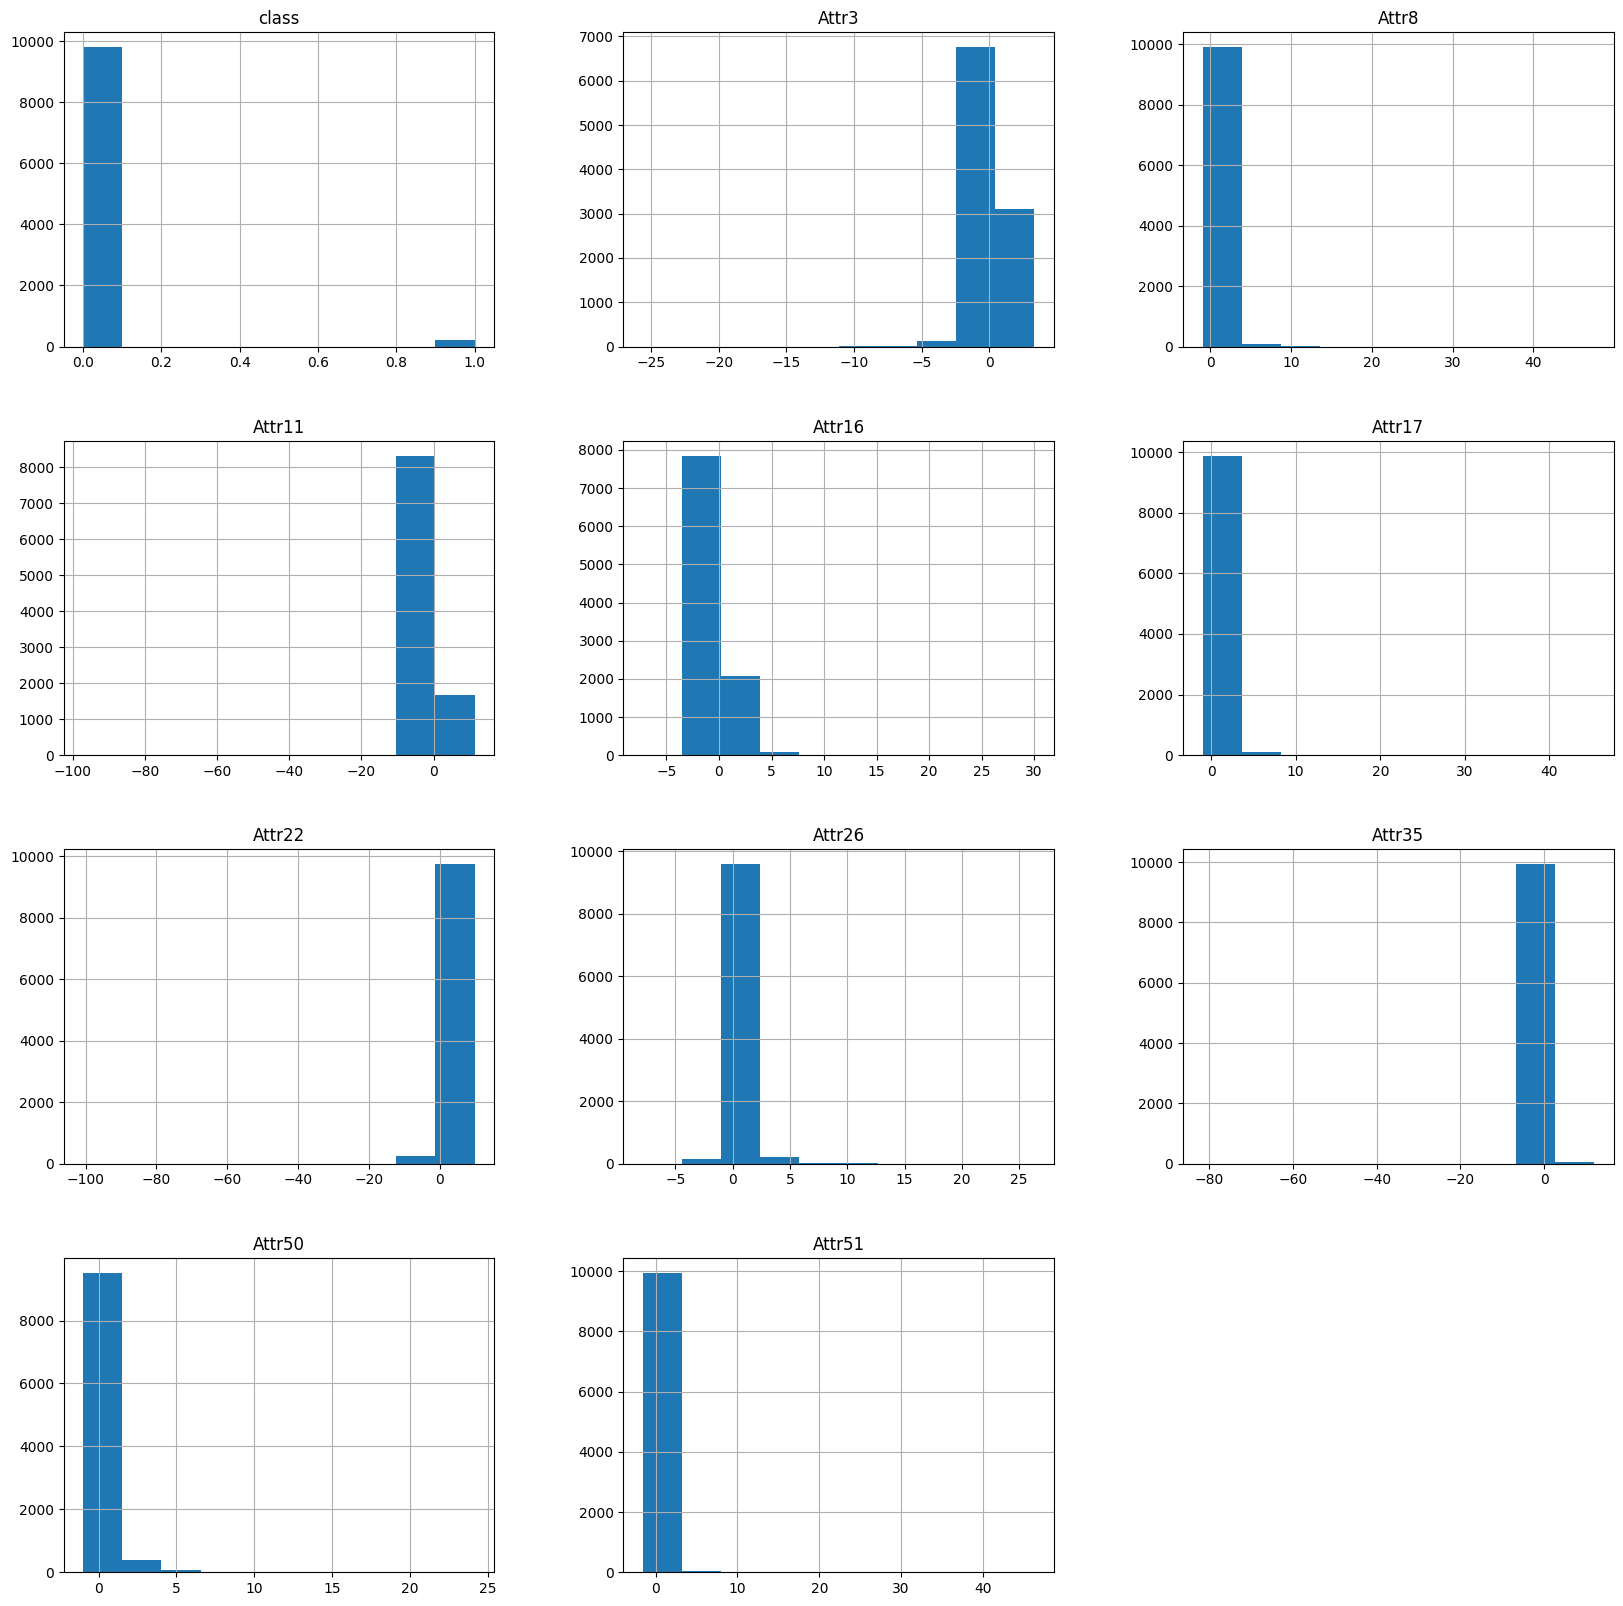

In [9]:
df.hist(figsize = (20,20))

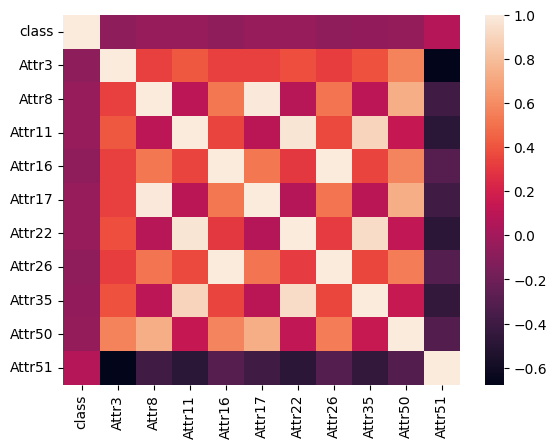

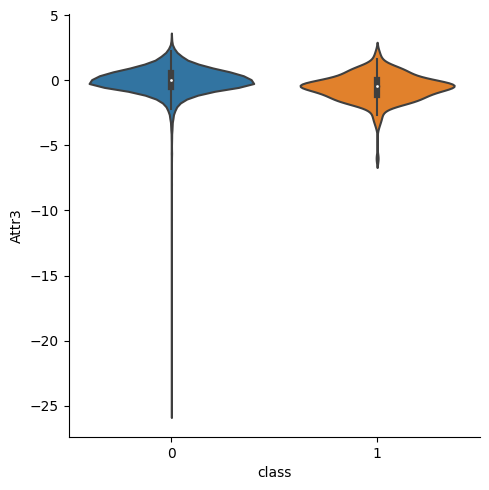

In [10]:
import seaborn as sns
sns.heatmap(df.corr())
sns.catplot(data=df, x="class", y="Attr3", kind ="violin") ##


<AxesSubplot:xlabel='Attr3', ylabel='Attr8'>

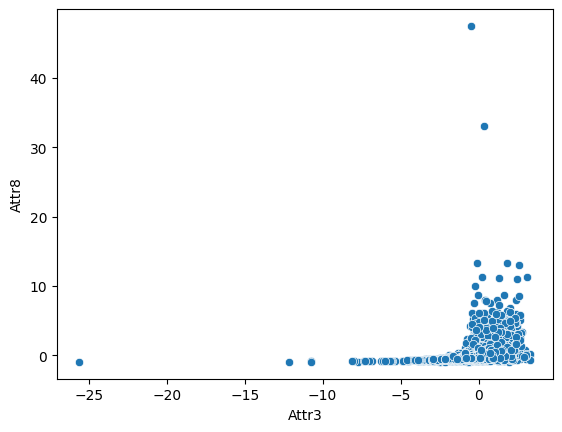

In [11]:
sns.scatterplot(data = df, x="Attr3", y="Attr8")
## continuous to continuous
## attr3 is working capital
## attr8 is equity

Text(0.5, 1.0, 'Bankrupty VS Attributes')

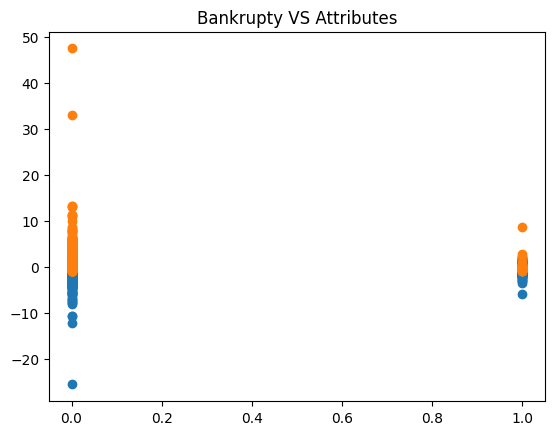

In [12]:
## Plotting three variables with pyplotlib
import matplotlib.pyplot as plt
plt.scatter(df['class'],df['Attr3'])
plt.scatter(df['class'],df['Attr8'])
plt.title("Bankrupty VS Attributes")


<h2> Due Dilligence on Data Sets. 

<h3> Checking for regression - VIF 

In [12]:
#vif to check collinearity 
#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)


   feature          VIF
0    Attr1   796.405319
1    Attr2  9071.474575
2    Attr3     4.246204
3    Attr4    10.695517
4    Attr5     1.004699
..     ...          ...
59  Attr60     6.836389
60  Attr61     1.129132
61  Attr62   151.227429
62  Attr63   133.637366
63  Attr64     6.803293

[64 rows x 2 columns]


<h3> QQ Plot to check heteroscedasticity 

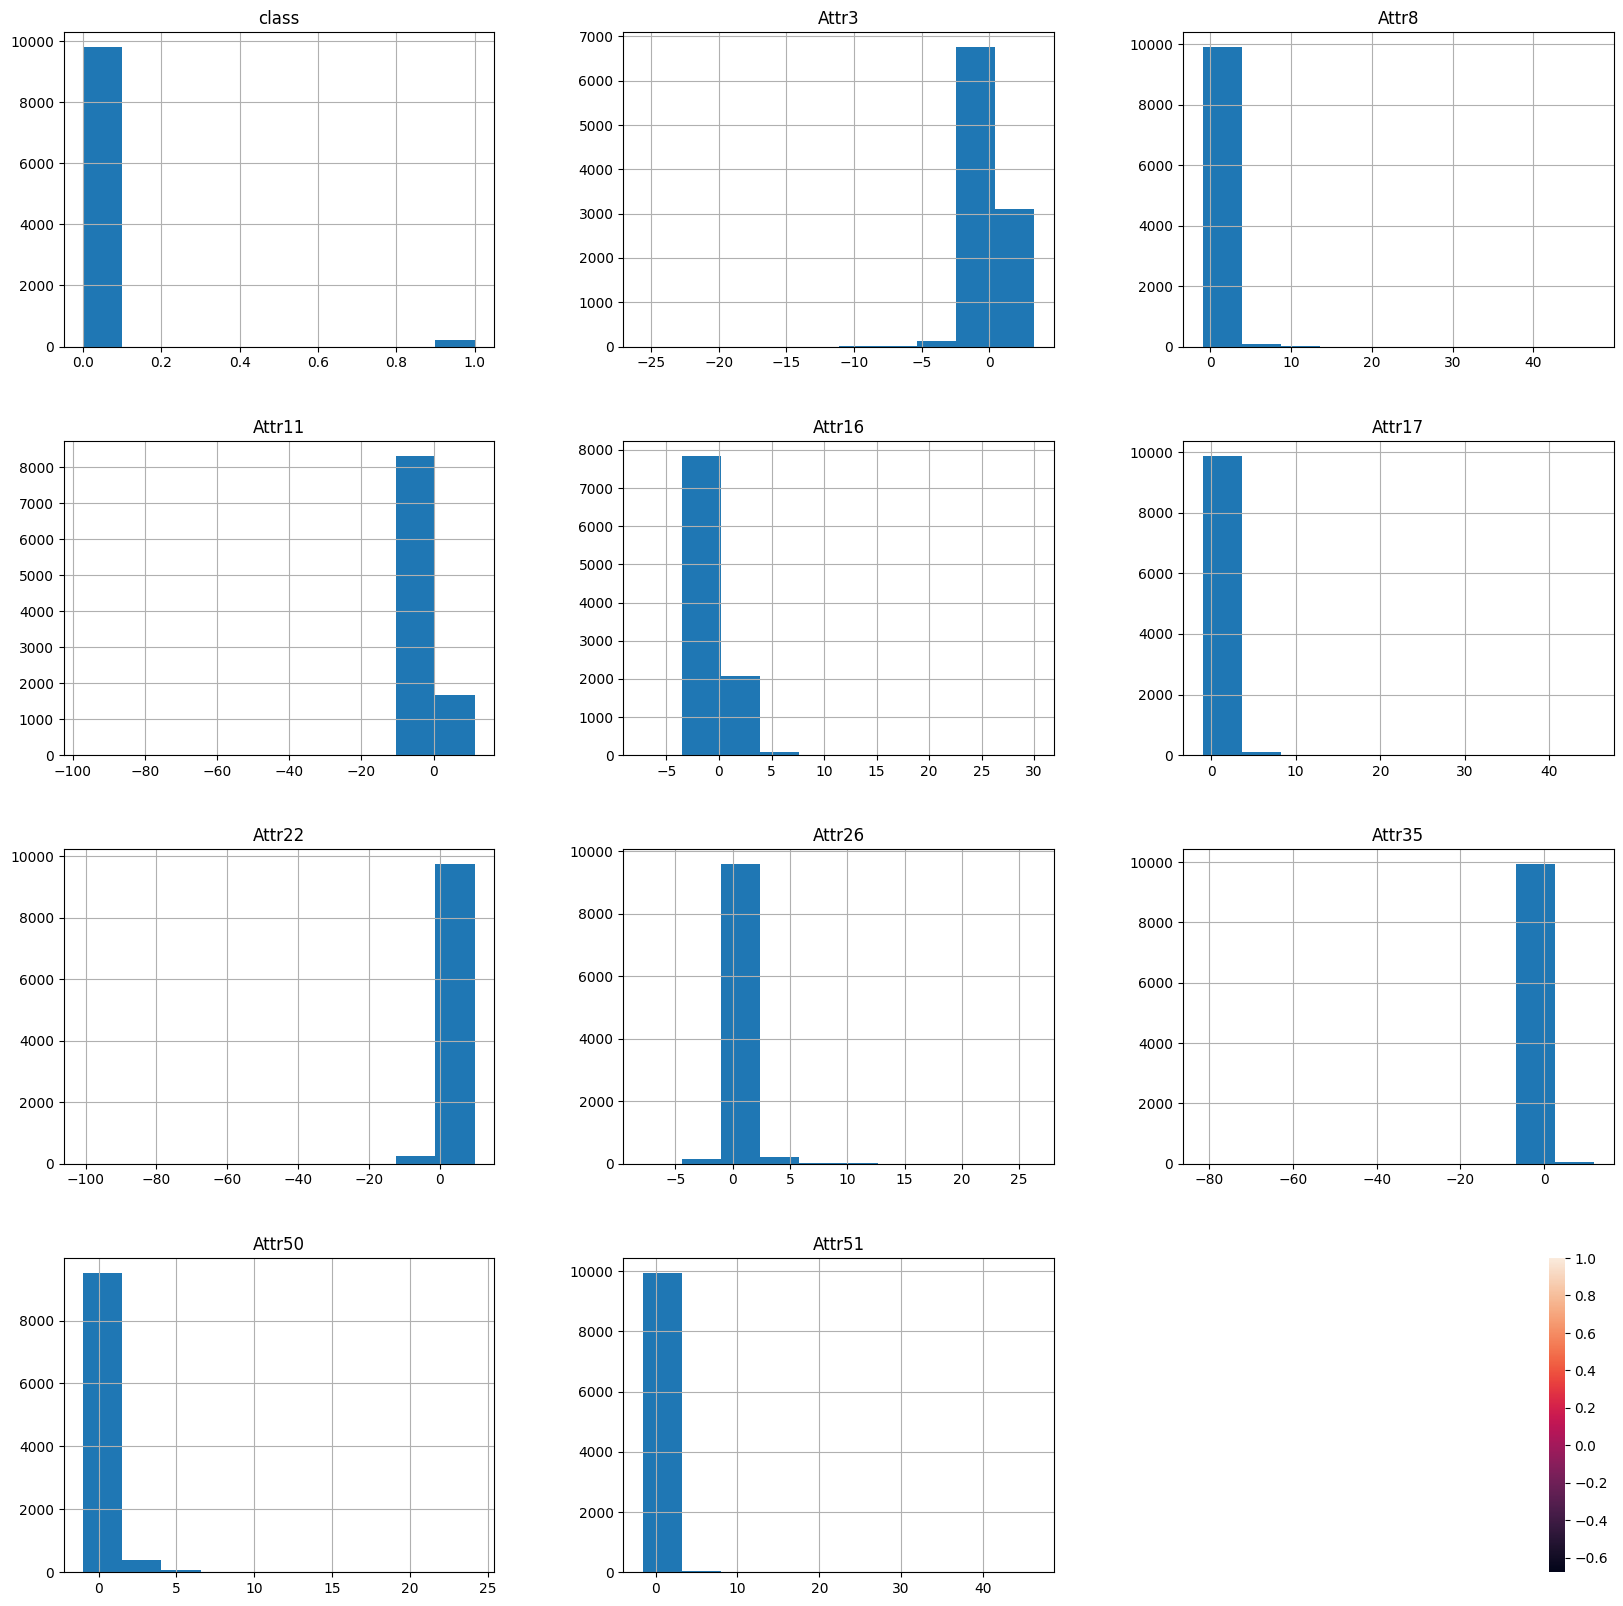

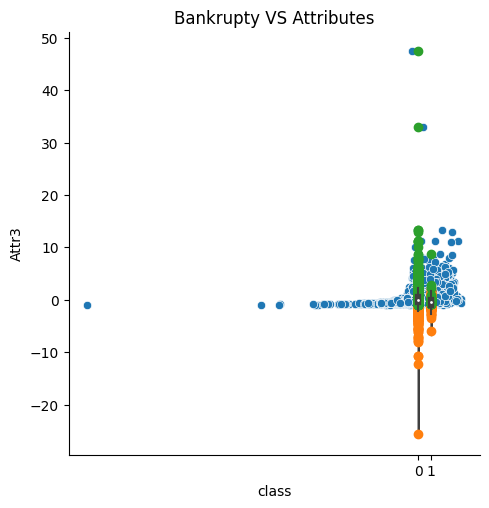

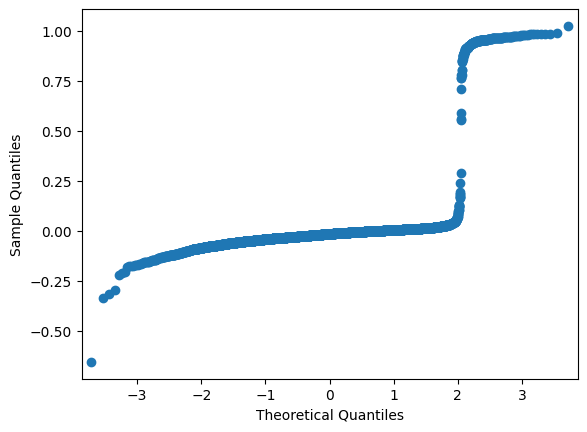

In [13]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
mod_fit = sm.OLS(y,x).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res)
plt.show()


<h3> Anova Check For Significance</h3>

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("y ~ x", df).fit()
print(model.summary())
anova_results = anova_lm(model)
print('\nANOVA results')
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     8.012
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           4.22e-68
Time:                        16:05:30   Log-Likelihood:                 5646.6
No. Observations:               10000   AIC:                        -1.117e+04
Df Residuals:                    9936   BIC:                        -1.070e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0909      0.023     -3.900      0.0

<h2> Check for imbalance

In [15]:
df['class'].value_counts()
## seems that there are way more classes of zero than of 1

0    9797
1     203
Name: class, dtype: int64

In [16]:
x = df.drop(columns ="class")
y = df['class']
## assigning independent variables all to X and target variables to y

<h2> Train Test Split & Balancing the data

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=311)

In [18]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()
model = SMOTE()
x_train, y_train = model.fit_resample(x_train,y_train)
## Only rebalance the train data for both X and Y, never the test data

In [19]:
y_train.value_counts()

0    7343
1    7343
Name: class, dtype: int64

<h2> Developing a classifier

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm= confusion_matrix(y_test,pred)

In [21]:
cm

array([[1685,  769],
       [   7,   39]])

In [22]:
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))
## Adding both the true positive rate and true negative rate divided by the total in the cm

accuracy 0.6896


In [23]:
from sklearn import tree 
model = tree.DecisionTreeClassifier(random_state=123)
model.fit(x_train, y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)



In [24]:
cm

array([[2231,  223],
       [  34,   12]])

In [25]:
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


accuracy 0.8972


<h2> Training an ensemble model </h2>

In [26]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy 0.94


In [27]:
from sklearn import ensemble
model = ensemble.GradientBoostingClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


accuracy 0.804


In [28]:
from sklearn import neural_network
model = neural_network.MLPClassifier(max_iter=500)
# model = neural_network.MLPRegressor(solver="lbfgs", hidden_layer_sizes=(12,2))
model.fit(x_train,y_train)
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))


accuracy 0.8824


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<h2> Checking the RMSE score of all models </h2>

In [29]:
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("rmse is : ", mean_squared_error(y_test, pred))


rmse is :  0.22535935234930604


In [30]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("rmse is : ", mean_squared_error(y_test, pred))


rmse is :  0.1008


In [31]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor()

model.fit(x_train, y_train)
pred = model.predict(x_test)
print("rmse is : ", mean_squared_error(y_test, pred))


rmse is :  0.05749004623333333


In [32]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor()

model.fit(x_train, y_train)
pred = model.predict(x_test)
print("rmse is : ", mean_squared_error(y_test, pred))


rmse is :  0.057122892


In [33]:
from sklearn import neural_network
model = neural_network.MLPRegressor(max_iter=500)
#model = neural_network.MLPRegressor(solver="lbfgs", hidden_layer_sizes=(12,2))
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("rmse is : ", mean_squared_error(y_test, pred))


rmse is :  0.16548104037190106


<h2> Saving the model

In [42]:
import joblib
## Saving the neural network model
joblib.dump(model,'NeuralNN_model.joblib') ## second parameter is the model name you wish to save as



['NeuralNN_model.joblib']

<h2> Importing the model

In [44]:
## Loading the model from the drive
model = joblib.load('NeuralNN_model.joblib')

print(model.predict([[data]])) ## Need to ask prof Teo what this does.

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<h2> Optimizing Classifiers </h2>

<h3> Optimizing Tree Based Classifiers Using Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid = 
            dict(max_depth = [i for i in range(1,20)]), 
            cv = 10)

In [37]:
grid = grid.fit(x_train, y_train)

In [38]:
grid.best_params_
## What does this tell us?

{'max_depth': 18}

In [39]:
grid.best_score_

0.9283669032855212

<h2> Optimizing Tree based classifier models  

<h3> Using GridSearchCV </h3>

In [40]:
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid=dict(max_depth = [i for i in range(1,20)]), cv = 10)
grid = grid.fit(x_train, y_train)
grid.best_params_
grid.best_score_

0.9280942382350595